In [21]:
#Import libraries and load data 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy import stats 
from scipy.stats import ttest_ind 

#Load dataset 

df = pd.read_csv("marketing_data.csv")

#Basic overview 

print("Dataset shape:", df.shape)
df.head()

#Datatypes 

df.info()
df.isnull().sum()

Dataset shape: (2240, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [30]:
print(df.columns.tolist())
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert date column to date format 
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Income summary
df['Income'].describe()

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']


count           2216
unique          1974
top       $7,500.00 
freq              12
Name: Income, dtype: object

In [33]:
# Unique values for education and marital status

print (df['Education'].unique())
print (df['Marital_Status'].unique())

['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [40]:
# Total children 
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

#Age 
df['Age'] = 2025 - df['Year_Birth']

# Total Spending 
spend_cols = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds']
df['Total_Spending'] = df[spend_cols].sum(axis=1)

# Total purchases 
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

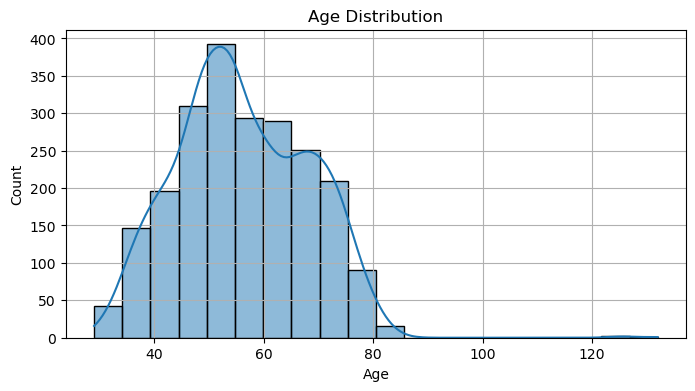

In [42]:
#Histogram for Age 
plt.figure(figsize=(8,4))
sns.histplot(df['Age'],bins=20, kde= True)
plt.title("Age Distribution")
plt.show()

In [66]:
from  sklearn.preprocessing import OrdinalEncoder, OneHotEncoder 

# Ordinal Encoding (Education)
edu_order = [['Basic', '2n Cycle','Graduation', 'Master','PhD']]
ordinal_encoder = OrdinalEncoder(categories=edu_order)
df['Educatrion_Encoded'] = ordinal_encoder.fit_transform(df[['Education']])

In [67]:
# One Hot Encoding (Marital Status)
df = pd.get_dummies(df, columns = ['Marital_Status', 'Country'], drop_first= True)

KeyError: "None of [Index(['Marital_Status', 'Country'], dtype='object')] are in the [columns]"

In [54]:
# Hypothesis 1 : Older people prefer store 
older = df[df['Age'] >df['Age'].median()]['NumStorePurchases']
younger = df[df['Age'] <=df['Age'].median()]['NumStorePurchases']
print ("Older vs Younger Store Purchases t-test:", ttest_ind(older, younger))


Older vs Younger Store Purchases t-test: TtestResult(statistic=6.334764651957808, pvalue=2.864558561083144e-10, df=2238.0)


In [56]:
# Hypothesis 2 : Customers with kids shop online more 
kids = df[df['Total_Children'] >0]['NumWebPurchases']
nokids = df[df['Total_Children'] ==0]['NumWebPurchases']
print ("Kids vs No Kids Web Purchases t-test:", ttest_ind(kids, nokids))


Kids vs No Kids Web Purchases t-test: TtestResult(statistic=-3.324463087423873, pvalue=0.0009001778860238199, df=2238.0)


In [57]:
# Hypothesis 3 : Other channels cannibalize store sales 
web_catalog = df['NumWebPurchases'] + df['NumCatalogPurchases']
print ("Correlation with Store Purchases:",web_catalog.corr(df['NumStorePurchases']))


Correlation with Store Purchases: 0.6153592978630222


In [58]:
#Hypothesis 4 : US vs Rest of World 
us_purchases = df[df['Country_US']==1]['Total_Purchases']
row_purchases = df[df['Country_US']==0]['Total_Purchases']
print ("US vs ROW Purchases t-test:", ttest_ind(us_purchases,row_purchases))

US vs ROW Purchases t-test: TtestResult(statistic=1.4512386847675383, pvalue=0.14685355981832418, df=2238.0)


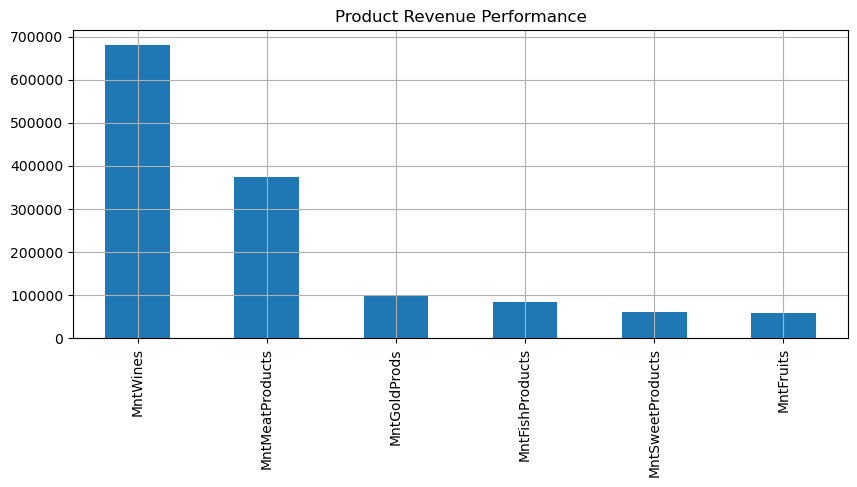

In [60]:
# Products perfomance 
df[spend_cols].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,4))
plt.title("Product Revenue Performance")
plt.show()

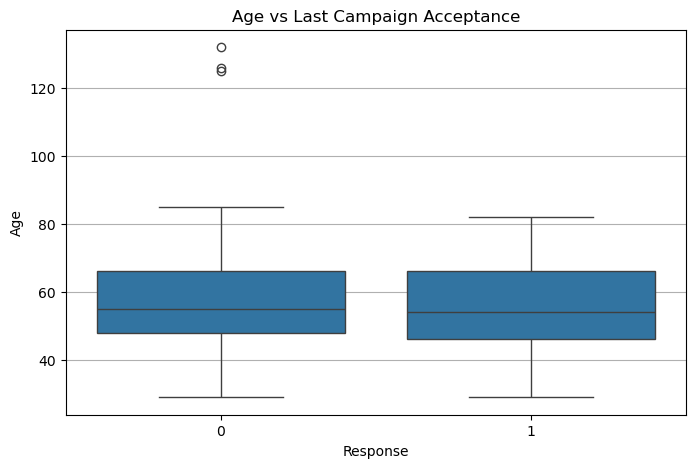

In [61]:
# Age vs Last Campaign Acceptance
sns.boxplot(x='Response', y='Age', data=df)
plt.title("Age vs Last Campaign Acceptance")
plt.show()

In [62]:
# Country with max campaign acceptance 
country_accept = df[df['Response']==1].groupby('Country_US').size()
print(country_accept)

Country_US
False    321
True      13
dtype: int64


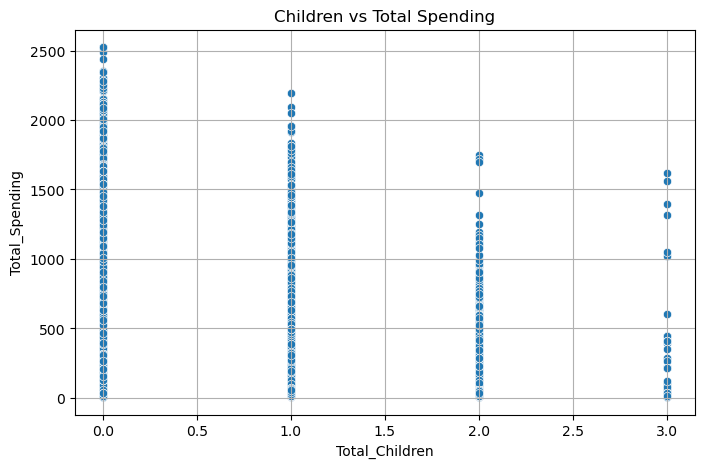

In [63]:
# Children vs Total spend
sns.scatterplot(x='Total_Children', y='Total_Spending', data=df)
plt.title('Children vs Total Spending')
plt.show()

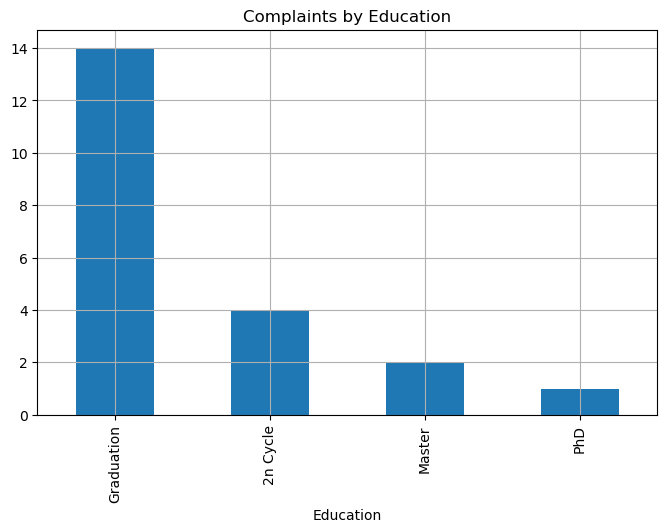

In [65]:
#Education background of complaints 
complaints = df[df['Complain']==1]['Education'].value_counts()
complaints.plot(kind='bar')
plt.title("Complaints by Education")
plt.show()